# **Lesson 6: Advanced Pandas II**

In [48]:
# All imports
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


## **1. Data Manipulation**

### **Combining and Merging DataFrames**

#### **concat():**

In [19]:
# DataFrames to concatenate
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'], 'B': ['B0', 'B1', 'B2']})
df2 = pd.DataFrame({'A': ['A3', 'A4', 'A5'], 'B': ['B3', 'B4', 'B5']})

# Concatenating along rows (default axis=0)
print("Vertical Concatenation:")
result = pd.concat([df1, df2])
print(result)

# Concatenating along columns
print("Horizontal Concatenation:")
result = pd.concat([df1, df2], axis=1)
print(result)

Vertical Concatenation:
    A   B
0  A0  B0
1  A1  B1
2  A2  B2
0  A3  B3
1  A4  B4
2  A5  B5
Horizontal Concatenation:
    A   B   A   B
0  A0  B0  A3  B3
1  A1  B1  A4  B4
2  A2  B2  A5  B5


#### **merge() Method**
The `merge()` method is similar to SQL joins, allowing you to combine DataFrames based on a key column. It offers multiple join operations:

- **Inner Join**: Keeps only rows with keys in both DataFrames.
- **Outer Join**: Includes all keys from both DataFrames, filling missing values with NaN.
- **Left Join**: Preserves keys from the left DataFrame.
- **Right Join**: Preserves keys from the right DataFrame.

In [21]:
# Create two sample DataFrames with overlapping and non-overlapping keys
df1 = pd.DataFrame({
    'key': ['K0', 'K1', 'K2', 'K3'],
    'A': ['A0', 'A1', 'A2', 'A3']
})

df2 = pd.DataFrame({
    'key': ['K1', 'K2', 'K3', 'K4'],
    'B': ['B1', 'B2', 'B3', 'B4']
})

print("DataFrame 1:")
print(df1)
print("\nDataFrame 2:")
print(df2)

# Inner Join: Returns only the intersection of the keys
print("\nInner Join Result:")
result_inner = pd.merge(df1, df2, on='key', how='inner')
print(result_inner)

# Outer Join: Returns union of keys, and fills missing values with NaN
print("\nOuter Join Result:")
result_outer = pd.merge(df1, df2, on='key', how='outer')
print(result_outer)

# Left Join: Returns all keys from the left DataFrame with corresponding matches from the right
print("\nLeft Join Result:")
result_left = pd.merge(df1, df2, on='key', how='left')
print(result_left)

# Right Join: Returns all keys from the right DataFrame with corresponding matches from the left
print("\nRight Join Result:")
result_right = pd.merge(df1, df2, on='key', how='right')
print(result_right)

DataFrame 1:
  key   A
0  K0  A0
1  K1  A1
2  K2  A2
3  K3  A3

DataFrame 2:
  key   B
0  K1  B1
1  K2  B2
2  K3  B3
3  K4  B4

Inner Join Result:
  key   A   B
0  K1  A1  B1
1  K2  A2  B2
2  K3  A3  B3

Outer Join Result:
  key    A    B
0  K0   A0  NaN
1  K1   A1   B1
2  K2   A2   B2
3  K3   A3   B3
4  K4  NaN   B4

Left Join Result:
  key   A    B
0  K0  A0  NaN
1  K1  A1   B1
2  K2  A2   B2
3  K3  A3   B3

Right Join Result:
  key    A   B
0  K1   A1  B1
1  K2   A2  B2
2  K3   A3  B3
3  K4  NaN  B4


#### **join() Method**
The `join()` method is mainly used when you have indexed DataFrames and you'd like to perform a join based on the index.

In [22]:
# DataFrames to join
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2']}, index=['K0', 'K1', 'K2'])
df2 = pd.DataFrame({'B': ['B1', 'B2', 'B3']}, index=['K0', 'K2', 'K3'])

# Using index to join
print("Index-Based Inner Join:")
result = df1.join(df2, how='inner')
print(result)

# Outer join on indexes
print("Index-Based Outer Join:")
result = df1.join(df2, how='outer')
print(result)

Index-Based Inner Join:
     A   B
K0  A0  B1
K2  A2  B2
Index-Based Outer Join:
      A    B
K0   A0   B1
K1   A1  NaN
K2   A2   B2
K3  NaN   B3


### **Grouping and Aggregating Data**

Grouping and aggregating your data allows you to generate insights by summarizing information.

#### **groupby() Method**
The `groupby()` function is used for grouping data and then applying aggregation functions like `sum`, `mean`, etc.


In [23]:
# Example DataFrame
df = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'B'],
    'Values': [10, 20, 30, 40]
})

grouped = df.groupby('Category')
print("Sum by Category:")
print(grouped.sum())

print("Mean by Category:")
print(grouped.mean())

print("Aggregate Mean and Sum:")
print(grouped.agg(['mean', 'sum']))

Sum by Category:
          Values
Category        
A             40
B             60
Mean by Category:
          Values
Category        
A           20.0
B           30.0
Aggregate Mean and Sum:
         Values    
           mean sum
Category           
A          20.0  40
B          30.0  60


#### **pivot_table() Method**
The `pivot_table()` is used for multi-dimensional summarization, similar to Excel's pivot tables. It allows creating a new table with aggregated data.

In [53]:
# Example DataFrame
df = pd.DataFrame({
    'A': ['foo', 'bar', 'foo', 'bar'],
    'B': ['one', 'one', 'two', 'two'],
    'C': ['small', 'large', 'small', 'small'],
    'D': [1, 2, 3, 4]
})

print("DataFrame:")
print(df)
# Creating a pivot table
print("Pivot Table:")
pivot = df.pivot_table(values='D', index=['A', 'B'], columns=['C'], aggfunc="sum")
print(pivot)

DataFrame:
     A    B      C  D
0  foo  one  small  1
1  bar  one  large  2
2  foo  two  small  3
3  bar  two  small  4
Pivot Table:
C        large  small
A   B                
bar one    2.0    NaN
    two    NaN    4.0
foo one    NaN    1.0
    two    NaN    3.0



#### **crosstab() Method**
The `crosstab()` function is used for computing a cross-tabulation of two (or more) factors, often for frequency counting.

In [54]:
# Survey data of platform preferences
survey_data = pd.DataFrame({
    'Platform': ['Twitter', 'Instagram', 'Twitter', 'Instagram', 'Facebook', 'Facebook'],
    'Gender': ['Female', 'Male', 'Male', 'Female', 'Female', 'Male']
})

print("\nSurvey Data:")
print(survey_data)

# Cross-tabulation of platform preferences by gender
print("\nCross-tabulation of Platform by Gender:")
platform_gender_crosstab = pd.crosstab(survey_data['Platform'], survey_data['Gender'])
print(platform_gender_crosstab)


Survey Data:
    Platform  Gender
0    Twitter  Female
1  Instagram    Male
2    Twitter    Male
3  Instagram  Female
4   Facebook  Female
5   Facebook    Male

Cross-tabulation of Platform by Gender:
Gender     Female  Male
Platform               
Facebook        1     1
Instagram       1     1
Twitter         1     1


In [55]:
# Purchase data with age groups and product categories
purchase_data = pd.DataFrame({
    'Age Group': ['18-25', '26-35', '18-25', '26-35', '36-45', '36-45', '26-35'],
    'Category': ['Electronics', 'Clothing', 'Electronics', 'Clothing', 'Groceries', 'Groceries', 'Electronics']
})

print("\nPurchase Data:")
print(purchase_data)

# Cross-tabulation to analyze product category purchases by age group
print("\nCross-tabulation of Product Categories by Age Group:")
category_age_crosstab = pd.crosstab(purchase_data['Category'], purchase_data['Age Group'])
print(category_age_crosstab)


Purchase Data:
  Age Group     Category
0     18-25  Electronics
1     26-35     Clothing
2     18-25  Electronics
3     26-35     Clothing
4     36-45    Groceries
5     36-45    Groceries
6     26-35  Electronics

Cross-tabulation of Product Categories by Age Group:
Age Group    18-25  26-35  36-45
Category                        
Clothing         0      2      0
Electronics      2      1      0
Groceries        0      0      2


### **Reshaping Data**

Reshaping involves changing the layout of your data to make further analysis more manageable.

#### **stack() and unstack() Methods**
These functions are used to pivot DataFrames with multi-level indexes.

In [28]:
# Example DataFrame with MultiIndex
df = pd.DataFrame({
    'A': ['one', 'one', 'two', 'two'],
    'B': ['A', 'B', 'A', 'B'],
    'C': [10, 20, 30, 40]
})
df = df.set_index(['A', 'B'])

print("Original Data:")
print(df)

# Stacking
print("Stacked Data:")
stacked = df.stack()
print(stacked)

# Unstacking
print("Unstacked Data:")
unstacked = stacked.unstack()
print(unstacked)

Original Data:
        C
A   B    
one A  10
    B  20
two A  30
    B  40
Stacked Data:
A    B   
one  A  C    10
     B  C    20
two  A  C    30
     B  C    40
dtype: int64
Unstacked Data:
        C
A   B    
one A  10
    B  20
two A  30
    B  40


#### **melt() Method**
The `melt()` function is used to convert a wide-format DataFrame into a long-format one, useful for data visualization libraries.


In [56]:
# A DataFrame with student names as rows and subjects as columns
df = pd.DataFrame({
    'Student': ['Alice', 'Bob', 'Charlie'],
    'Math': [85, 90, 78],
    'Science': [88, 92, 89]
})

print("Original DataFrame:")
print(df)

# Using melt to reshape the DataFrame
print("\nMelted DataFrame:")
melted = pd.melt(df, id_vars=['Student'], value_vars=['Math', 'Science'], var_name='Subject', value_name='Score')
print(melted)

Original DataFrame:
   Student  Math  Science
0    Alice    85       88
1      Bob    90       92
2  Charlie    78       89

Melted DataFrame:
   Student  Subject  Score
0    Alice     Math     85
1      Bob     Math     90
2  Charlie     Math     78
3    Alice  Science     88
4      Bob  Science     92
5  Charlie  Science     89


In [57]:
# Sales data for different regions and quarters
sales_data = pd.DataFrame({
    'Region': ['East', 'West', 'South', 'North'],
    'Q1': [200, 150, 210, 180],
    'Q2': [220, 180, 230, 190],
    'Q3': [250, 200, 270, 210],
    'Q4': [300, 220, 300, 230]
})

print("\nOriginal Sales Data:")
print(sales_data)

# Melting for easier plotting or analysis
print("\nMelted Sales Data:")
melted_sales = pd.melt(sales_data, id_vars=['Region'], var_name='Quarter', value_name='Sales')
print(melted_sales)


Original Sales Data:
  Region   Q1   Q2   Q3   Q4
0   East  200  220  250  300
1   West  150  180  200  220
2  South  210  230  270  300
3  North  180  190  210  230

Melted Sales Data:
   Region Quarter  Sales
0    East      Q1    200
1    West      Q1    150
2   South      Q1    210
3   North      Q1    180
4    East      Q2    220
5    West      Q2    180
6   South      Q2    230
7   North      Q2    190
8    East      Q3    250
9    West      Q3    200
10  South      Q3    270
11  North      Q3    210
12   East      Q4    300
13   West      Q4    220
14  South      Q4    300
15  North      Q4    230



## **2. Time Series Analysis**

Pandas supports robust handling of time series data, which is critical for analyzing time-dependent data.

### **Datetime Conversion**
Converting strings to datetime objects allows for efficient analysis and manipulation of date information.


In [30]:
# Converting a column to datetime
df = pd.DataFrame({
    'date_str': ['2023-01-01', '2023-02-01', '2023-03-01'],
    'value': [10, 20, 30]
})
df['date'] = pd.to_datetime(df['date_str'])
print(df)

     date_str  value       date
0  2023-01-01     10 2023-01-01
1  2023-02-01     20 2023-02-01
2  2023-03-01     30 2023-03-01


### **Date Indexing and Selection**
Using datetime indexes facilitates easy slicing and selection of data over periods.


In [40]:
# Example DataFrame with datetime index
df = pd.DataFrame({
    'date': pd.date_range(start='1/1/2023', periods=5, freq='D'),
    'value': [10, 20, 30, 40, 50]
})
df.set_index('date', inplace=True)
print(df)

# Selecting data by date
print("Data for Single Day:")
print(df.loc['2023-01-02'])
print("Data for Range of Dates:")
print(df.loc['2023-01-02':'2023-01-04'])

            value
date             
2023-01-01     10
2023-01-02     20
2023-01-03     30
2023-01-04     40
2023-01-05     50
Data for Single Day:
value    20
Name: 2023-01-02 00:00:00, dtype: int64
Data for Range of Dates:
            value
date             
2023-01-02     20
2023-01-03     30
2023-01-04     40


### **Time Series-specific Operations**
Pandas offers specialized operations for time series, such as `resampling` and `rolling`.


In [41]:
# Resampling
print("Resampled Data:")
resampled = df.resample('2D').sum()
print(resampled)

# Rolling windows
print("Rolling Mean:")
rolling = df.rolling(window=2).mean()
print(rolling)

Resampled Data:
            value
date             
2023-01-01     30
2023-01-03     70
2023-01-05     50
Rolling Mean:
            value
date             
2023-01-01    NaN
2023-01-02   15.0
2023-01-03   25.0
2023-01-04   35.0
2023-01-05   45.0


## **3. Advanced Data Selection and Manipulation**

### **Transformation Functions**

Transformation functions like `apply`, and `map` are used to perform operations on DataFrames.


In [51]:
# Example DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [10, 20, 30]
})

# Applying functions element-wise
print("Square Root of DataFrame:")
print(df.apply(np.sqrt))  # Apply to each column
print("Sum of Rows:")
print(df.apply(np.sum, axis=1))  # Apply to each row

# Applying a function element-wise to Series using map()
print("Doubling 'A' Values using map:")
df['A'] = df['A'].map(lambda x: x*2)
print(df)

Square Root of DataFrame:
          A         B
0  1.000000  3.162278
1  1.414214  4.472136
2  1.732051  5.477226
Sum of Rows:
0    11
1    22
2    33
dtype: int64
Doubling 'A' Values using map:
   A   B
0  2  10
1  4  20
2  6  30


## **4. Visualization with Pandas**

Visualization is crucial for data exploration and understanding trends and patterns.

### **Basic Plotting**
Pandas provides simple interface for plotting directly from DataFrames.

Line Plot:
Bar Plot:
Scatter Plot:


<Axes: xlabel='A', ylabel='B'>

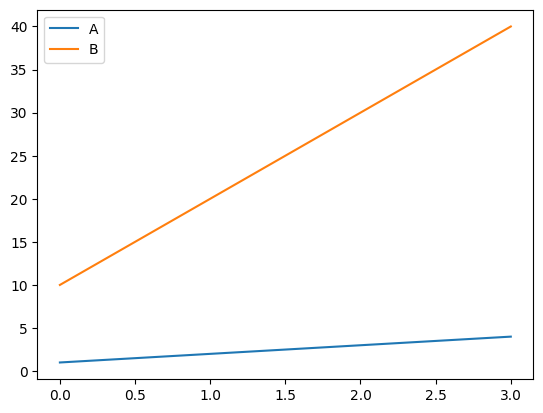

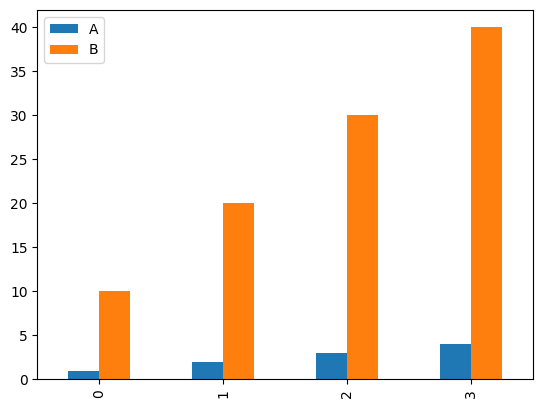

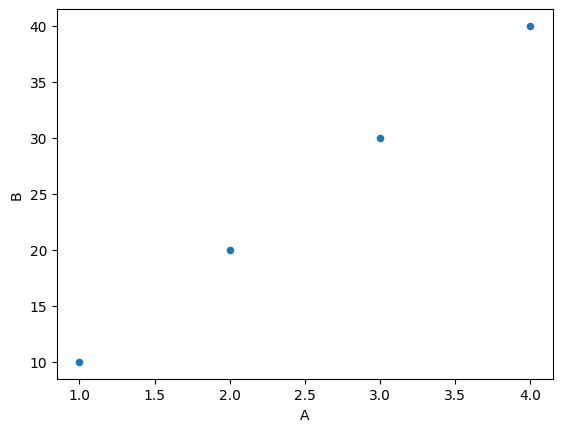

In [47]:
# Sample DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [10, 20, 30, 40]
})

# Line plot
print("Line Plot:")
df.plot() # you might need to install matplotlib with pip install matplotlib

# Bar plot
print("Bar Plot:")
df.plot(kind='bar')

# Scatter plot
print("Scatter Plot:")
df.plot(kind='scatter', x='A', y='B')

## **5. Optimization and Performance**

### **Memory Usage**
Understanding and optimizing memory usage can significantly improve performance, especially with large datasets.


In [50]:
# Checking DataFrame memory usage
df_memory = pd.DataFrame({
    'int_col': [1, 2, 3],
    'float_col': [4.0, 5.0, 6.0],
    'object_col': ['a', 'b', 'c']
})
print("Memory Usage:")
print(df_memory.memory_usage(deep=True))

# Downcasting data types to save memory
df_memory['int_col'] = pd.to_numeric(df_memory['int_col'], downcast='unsigned')
df_memory['float_col'] = pd.to_numeric(df_memory['float_col'], downcast='float')
print("Optimized Memory Usage:")
print(df_memory.memory_usage(deep=True))

Memory Usage:
Index         132
int_col        24
float_col      24
object_col    150
dtype: int64
Optimized Memory Usage:
Index         132
int_col         3
float_col      12
object_col    150
dtype: int64
